In [107]:
import pandas as pd

In [108]:
import numpy as np

In [110]:
import matplotlib.pyplot as plt

In [111]:
import seaborn as sns

In [112]:
df = pd.read_excel(r"C:\Users\rishv\OneDrive\Desktop\Projects\Supertore_Usa_Python_DA.xls\Superstore_USA.xlsx")

In [113]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [114]:
df

In [115]:
df.shape

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [116]:
df.head()

# Null_Values_Check

In [117]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [118]:
#df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

# Typing_Error/Order priority count

In [119]:
df['Order Priority'].value_counts()

In [120]:
df['Order Priority'].unique()

In [121]:
df["Order Priority"] = df['Order Priority'].replace( 'Critical ', 'Critical')

<Axes: title={'center': 'Count of Order Priority'}, xlabel='Order Priority', ylabel='count'>

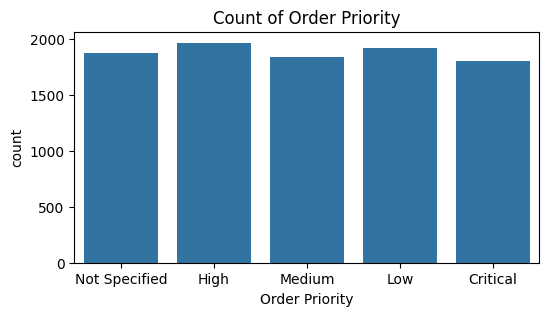

In [122]:
plt.figure(figsize=(6,3))
plt.title('Count of Order Priority')
sns.countplot(x='Order Priority',data = df)

# Customer Segements

<Axes: xlabel='Customer Segment', ylabel='count'>

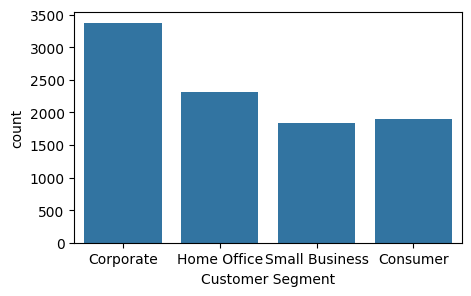

In [222]:
plt.figure(figsize=(5,3))
sns.countplot(x='Customer Segment',data=df)

# Shipping_Mode

In [123]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [124]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

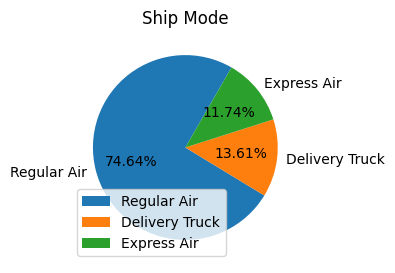

In [125]:
plt.figure(figsize=(6,3))
plt.title('Ship Mode')
plt.pie(y,labels=x,startangle = 60, autopct='%0.2f%%')
plt.legend(loc=3)


<Axes: xlabel='Ship Mode', ylabel='count'>

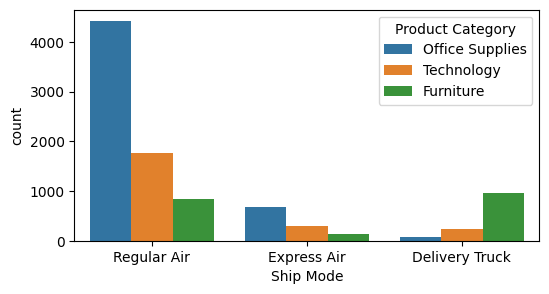

In [127]:
plt.figure(figsize=(6,3))
sns.countplot(x='Ship Mode', data=df,hue='Product Category')

# Product Category Insight

<Axes: xlabel='Product Category', ylabel='count'>

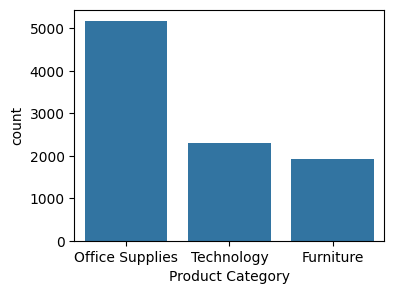

In [134]:
plt.figure(figsize=(4,3))
sns.countplot(x='Product Category',data=df)

<Axes: xlabel='Product Category', ylabel='count'>

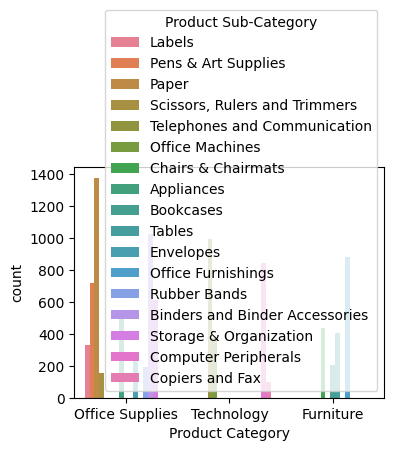

In [145]:
plt.figure(figsize=(4,3))
sns.countplot(x='Product Category',data=df, hue = 'Product Sub-Category')
#here no. of subcategories are quite high that is why we will partially vizualise these subcategories according to the Product categories


<Axes: xlabel='Product Category', ylabel='count'>

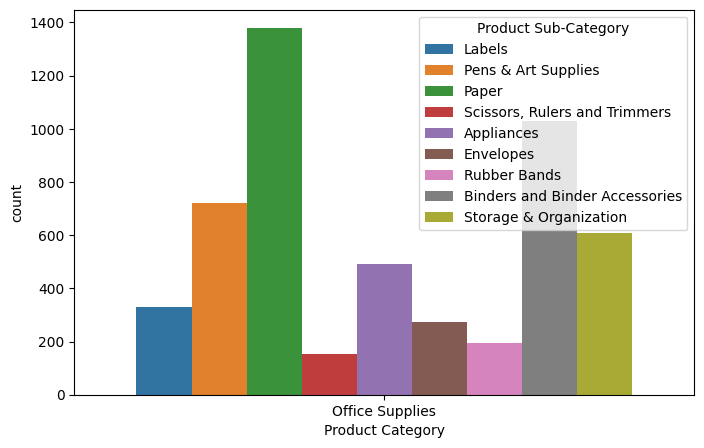

In [171]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product Category',data=df[df['Product Category']=='Office Supplies'], hue = 'Product Sub-Category')

<Axes: xlabel='Product Category', ylabel='count'>

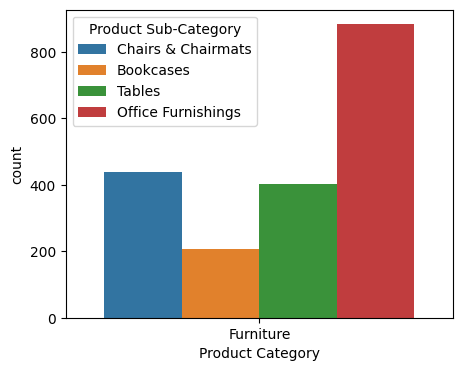

In [173]:
plt.figure(figsize=(5,4))
sns.countplot(x='Product Category',data=df[df['Product Category']=='Furniture'], hue = 'Product Sub-Category')

<Axes: xlabel='Product Category', ylabel='count'>

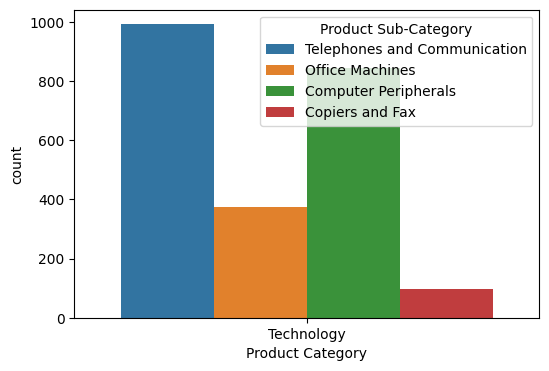

In [168]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=df[df['Product Category']=='Technology'], hue = 'Product Sub-Category')

# Year wise Order Insight

In [200]:
df['Order Year'] = df['Order Date'].dt.year

In [198]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

In [208]:
#df.info()

# Profit 

In [201]:
df['Profit'].value_counts()

Profit
 0      109
-2       66
 5       60
-5       59
 2       58
       ... 
 652      1
 598      1
-699      1
-340      1
 462      1
Name: count, Length: 2201, dtype: int64

In [209]:
df['Profit'] = df['Profit'].astype(float)

<Axes: xlabel='Order Year', ylabel='count'>

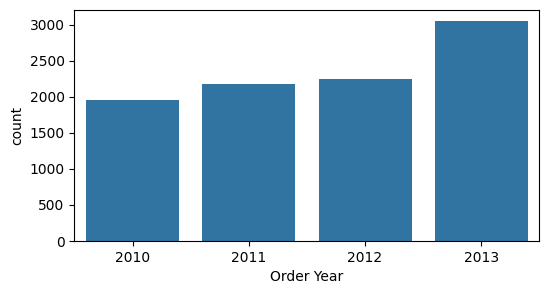

In [207]:
plt.figure(figsize=(6,3))
sns.countplot(x='Order Year', data=df)

<Axes: xlabel='Product Category', ylabel='Profit'>

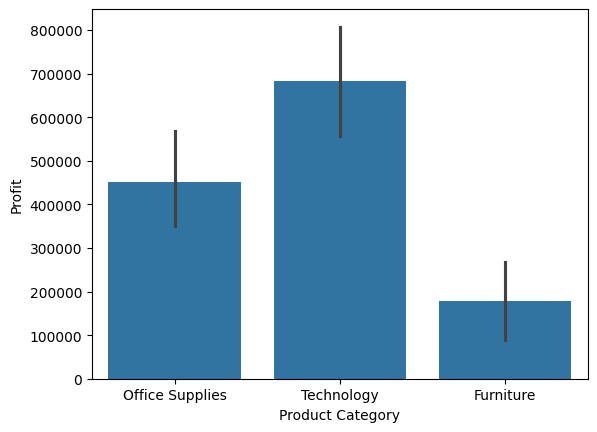

In [210]:
sns.barplot(x= 'Product Category', y= 'Profit', data = df,estimator= 'sum')

# Analysing profit from different localities 

In [216]:
df['State or Province'].value_counts()[:5]  #top 5 states of profit making

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [220]:
df['State or Province'].value_counts()[-5:]   #bottom 5 states in profit making list

State or Province
North Dakota    34
South Dakota    28
Wyoming         21
Rhode Island    20
Delaware        15
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='Product Base Margin'>

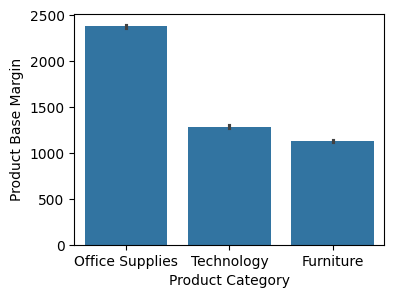

In [221]:
plt.figure(figsize=(4,3))
sns.barplot(x='Product Category',y= 'Product Base Margin', data=df,estimator= np.sum)  #Base Margin of Product Categories